In [1]:
import os
import subprocess

import numpy as np
from pathlib import Path
import lossmaps as lm
import matplotlib.pyplot as plt

 If you are on SWAN and did not expect this warning, then restart and load the 'NXCals Pro' software stack.


In [3]:
path_dir = Path('/eos/user/l/lpauwels/ht_condor_sps_tracking_results/no_blowup_imperfections/run_25.02.2025')

In [11]:
lm_dir = Path('/eos/user/l/lpauwels/ht_condor_sps_tracking_results/no_blowup_imperfections/lossmaps_diffusion')

In [6]:
def get_lossmap_paths(path, file_name_base):

    n_jobs = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d | wc -l', shell=True))
    n_jobs_succeeded = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d -not -empty | wc -l', shell=True))
    
    job_files_list = []
    for i in range(n_jobs):
        current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}.json', shell=True)).decode('ascii').strip()
        #current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}_{plane}.json', shell=True)).decode('ascii').strip()
        
        if os.path.exists(current_file_path):
            job_files_list.append(current_file_path)
        else:
            print(f'Job {i} failed')
    
    print(f'{n_jobs_succeeded} out of a total of {n_jobs} succeeded')
    if n_jobs_succeeded != len(job_files_list):
        print('ERROR: not all succeeded jobs paths were retrieved')
        
    return job_files_list

# Paths to subdirectories

In [16]:
paths_subdirs = {
    'ripple_errors': {
        'xhsell' : Path(path_dir, 'ripple_errors/xshell'), 
        'lshell' : Path(path_dir, 'ripple_errors/lshell'),
        'xlshell' : Path(path_dir, 'ripple_errors/xlshell')
    },
    'ripple': {
        'xhsell' : Path(path_dir, 'ripple/xshell'), 
        'lshell' : Path(path_dir, 'ripple/lshell'),
        'xlshell' : Path(path_dir, 'ripple/xlshell')
    },
    'errors' : {
        'xhsell' : Path(path_dir, 'errors/xshell'), 
        'lshell' : Path(path_dir, 'errors/lshell'),
        'xlshell' : Path(path_dir, 'errors/xlshell')
    }
}

In [ ]:
lms_paths = {
    'ripple_errors': {
        'xhsell' : get_lossmap_paths(paths_subdirs['ripple_errors']['xshell'], 'LM_ripple_errors_xshell'),
        'lshell' : get_lossmap_paths(paths_subdirs['ripple_errors']['lshell'], 'LM_ripple_errors_lshell'),
        'xlshell' : get_lossmap_paths(paths_subdirs['ripple_errors']['xlshell'], 'LM_ripple_errors_xlshell')
    },
    'ripple': {
        'xhsell' : get_lossmap_paths(paths_subdirs['ripple']['xshell'], 'LM_ripple_xshell'),
        'lshell' : get_lossmap_paths(paths_subdirs['ripple']['lshell'], 'LM_ripple_lshell'),
        'xlshell' : get_lossmap_paths(paths_subdirs['ripple']['xlshell'], 'LM_ripple_xlshell')
    },
    'errors' : {
        'xhsell' : get_lossmap_paths(paths_subdirs['errors']['xshell'], 'LM_errors_xshell'),
        'lshell' : get_lossmap_paths(paths_subdirs['errors']['lshell'], 'LM_errors_lshell'),
        'xlshell' : get_lossmap_paths(paths_subdirs['errors']['xlshell'], 'LM_errors_xlshell')
    }
}

5000 out of a total of 5000 succeeded
Job 2924 failed
5000 out of a total of 5000 succeeded
ERROR: not all succeeded jobs paths were retrieved
5000 out of a total of 5000 succeeded
5000 out of a total of 5000 succeeded
5000 out of a total of 5000 succeeded
Job 4719 failed
4999 out of a total of 5000 succeeded
5000 out of a total of 5000 succeeded
5000 out of a total of 5000 succeeded
5000 out of a total of 5000 succeeded


In [22]:
lms_paths['ripple_errors']['xshell'] = lms_paths['ripple_errors']['xhsell']
lms_paths['ripple']['xshell'] = lms_paths['ripple']['xhsell']
lms_paths['errors']['xshell'] = lms_paths['errors']['xhsell']

# Ripple and errors

In [19]:
sim_type = 'ripple_errors'

## X shell

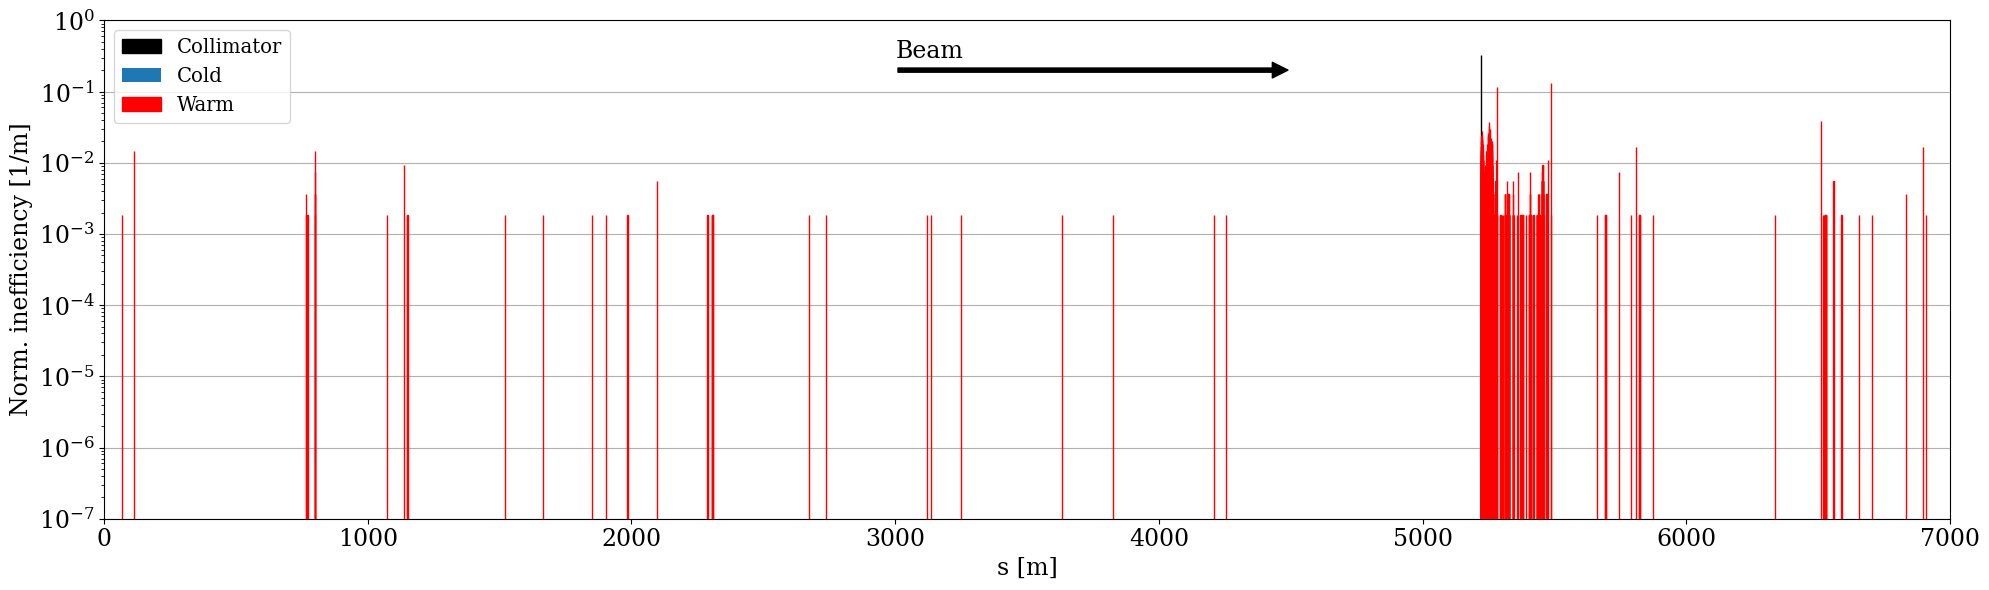

In [23]:
shell = 'xshell'
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_paths[sim_type][shell])
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile=f'lossmaps_diffusion/LM_{sim_type}_{shell}.png')
plt.show()

## L shell

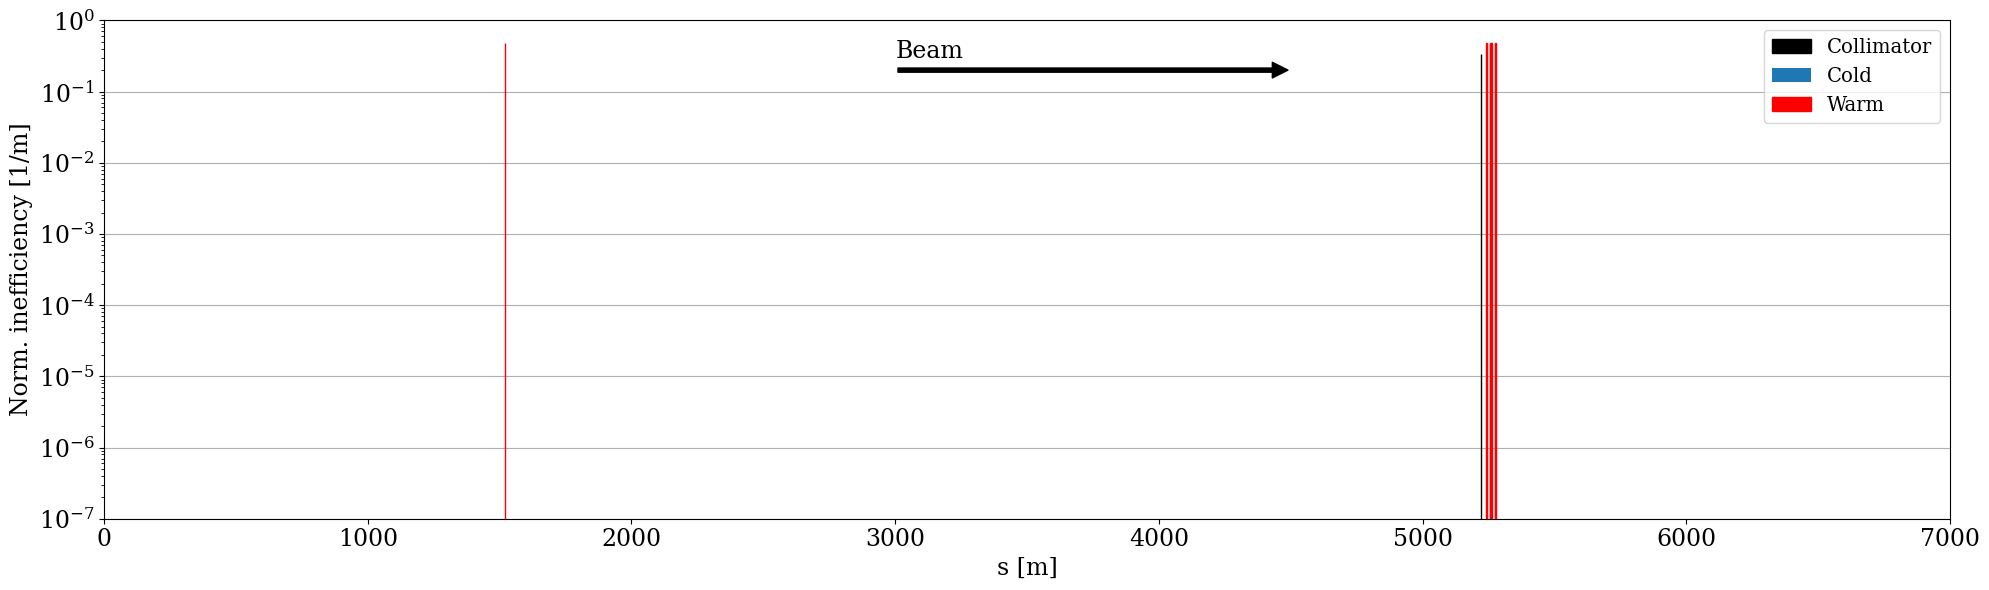

In [25]:
shell = 'lshell'
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_paths[sim_type][shell])
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile=f'lossmaps_diffusion/LM_{sim_type}_{shell}.png')
plt.show()

## XL shell

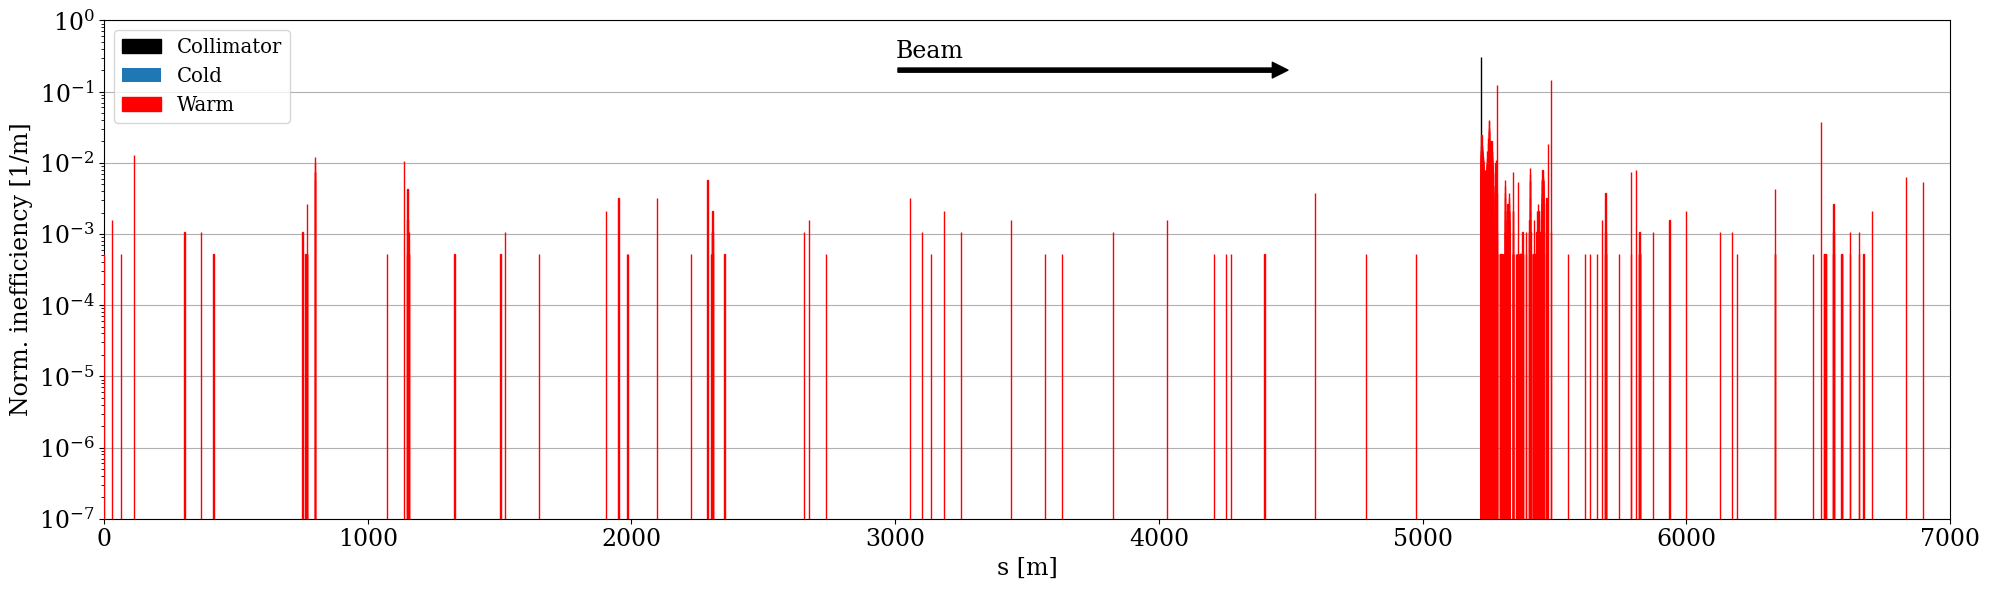

In [27]:
shell = 'xlshell'
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_paths[sim_type][shell])
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile=f'lossmaps_diffusion/LM_{sim_type}_{shell}.png')
plt.show()

# Ripple

In [28]:
sim_type = 'ripple'

## X shell

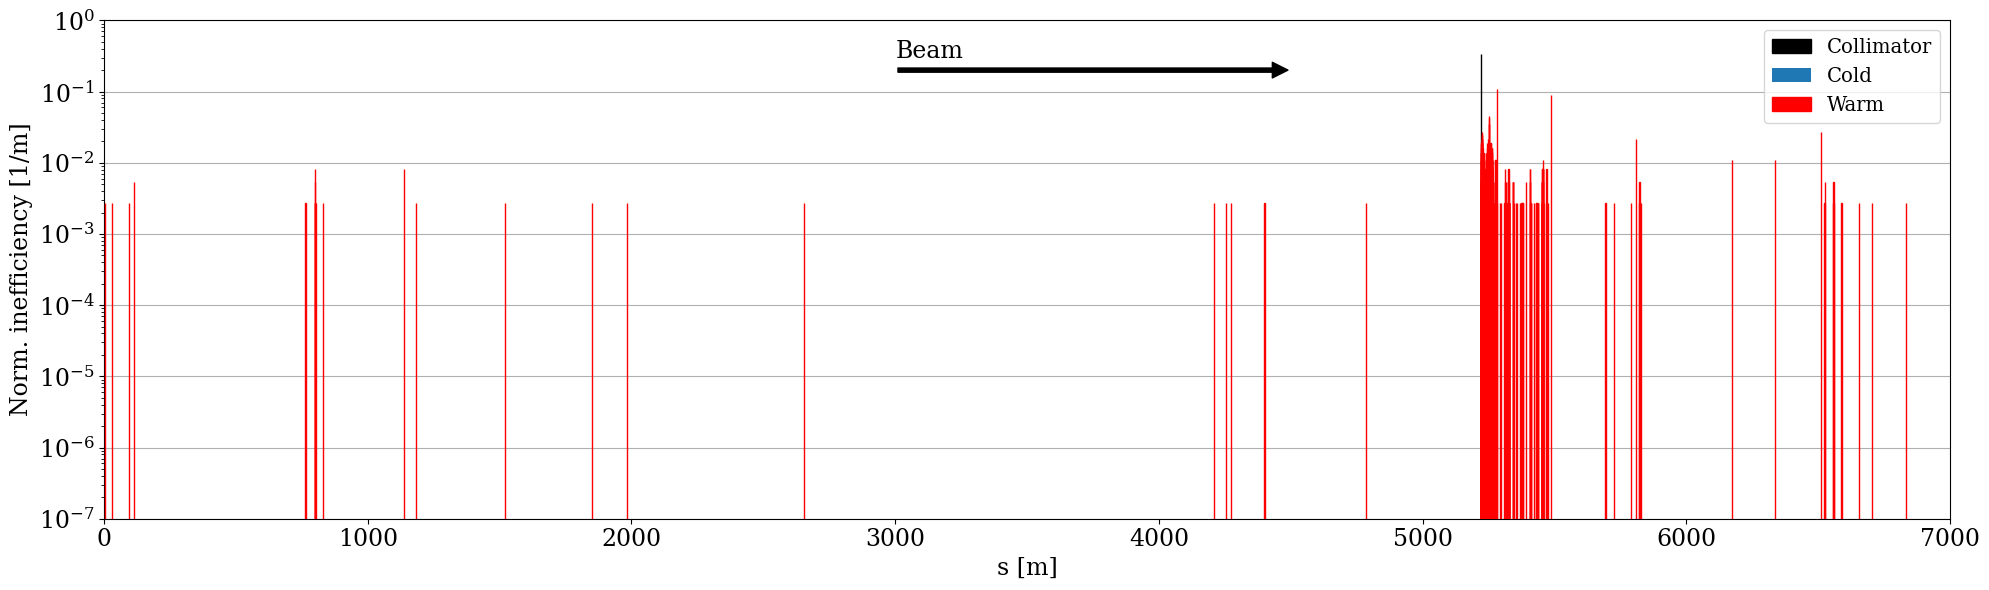

In [30]:
shell = 'xshell'
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_paths[sim_type][shell])
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile=f'lossmaps_diffusion/LM_{sim_type}_{shell}.png')
plt.show()

## L shell

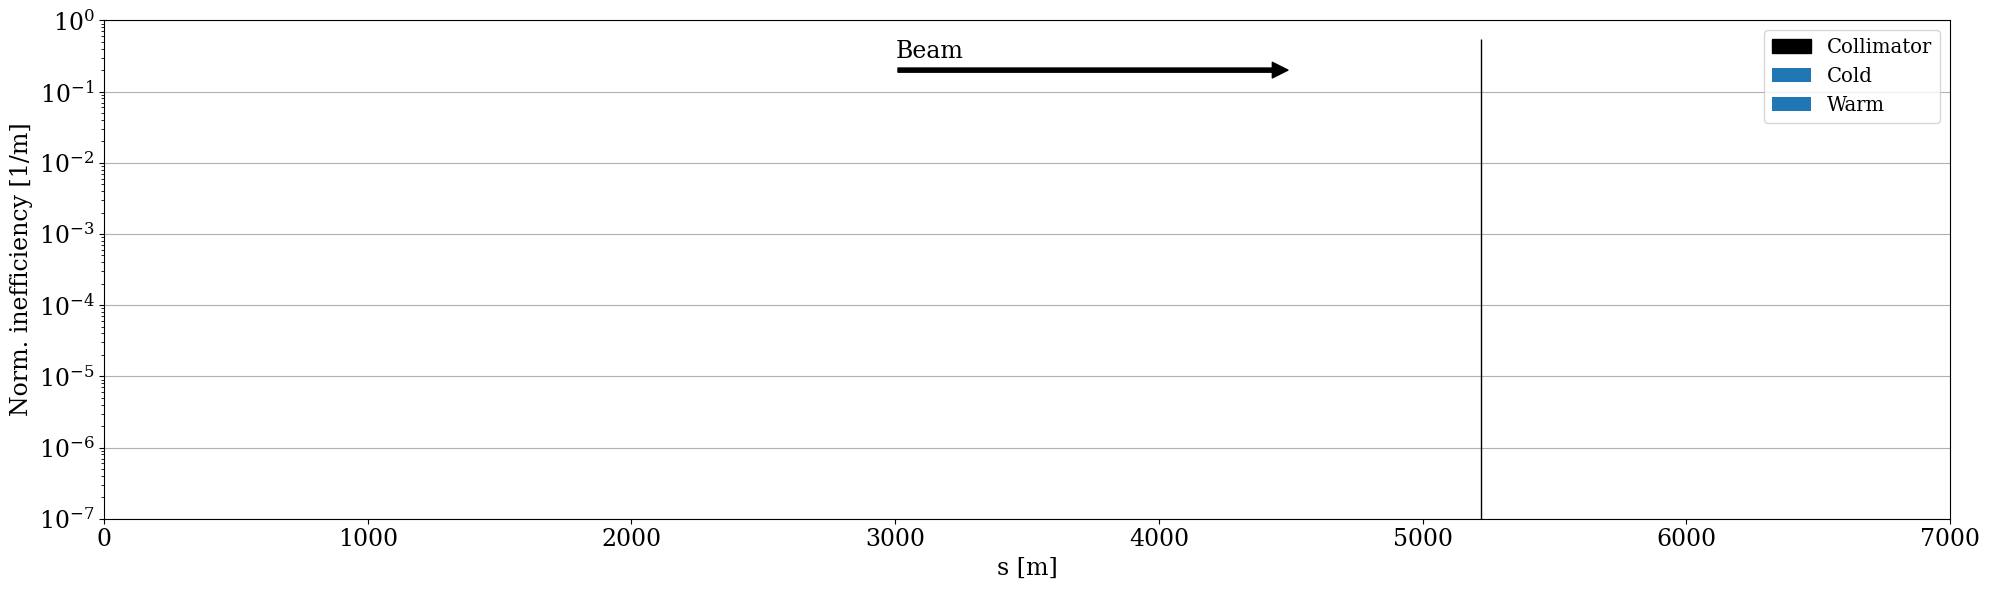

In [33]:
shell = 'lshell'
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_paths[sim_type][shell])
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile=f'lossmaps_diffusion/LM_{sim_type}_{shell}.png')
plt.show()

## XL shell

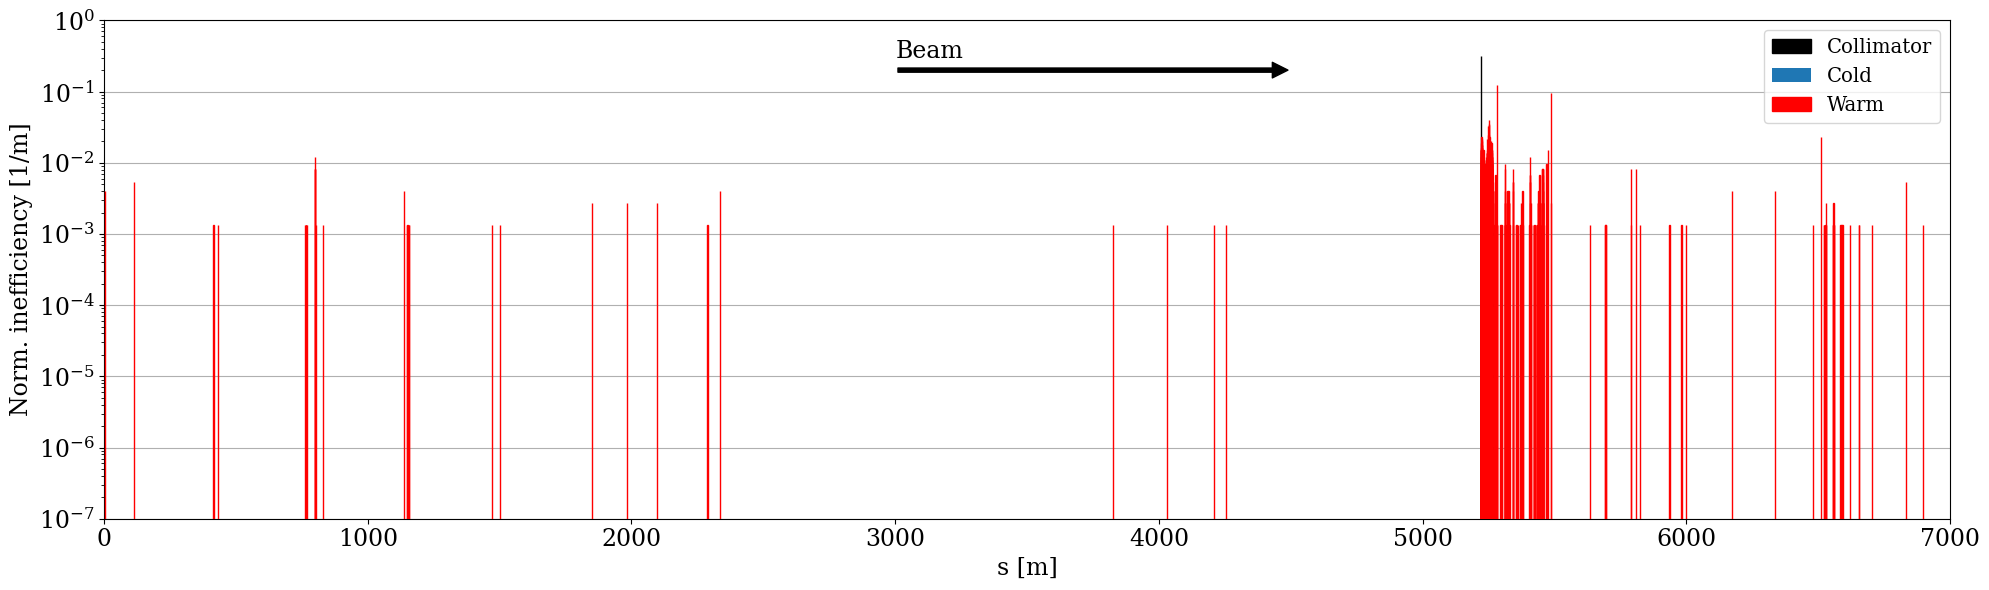

In [35]:
shell = 'xlshell'
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_paths[sim_type][shell])
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile=f'lossmaps_diffusion/LM_{sim_type}_{shell}.png')
plt.show()

# Errors

In [36]:
sim_type = 'errors'

## Xshell

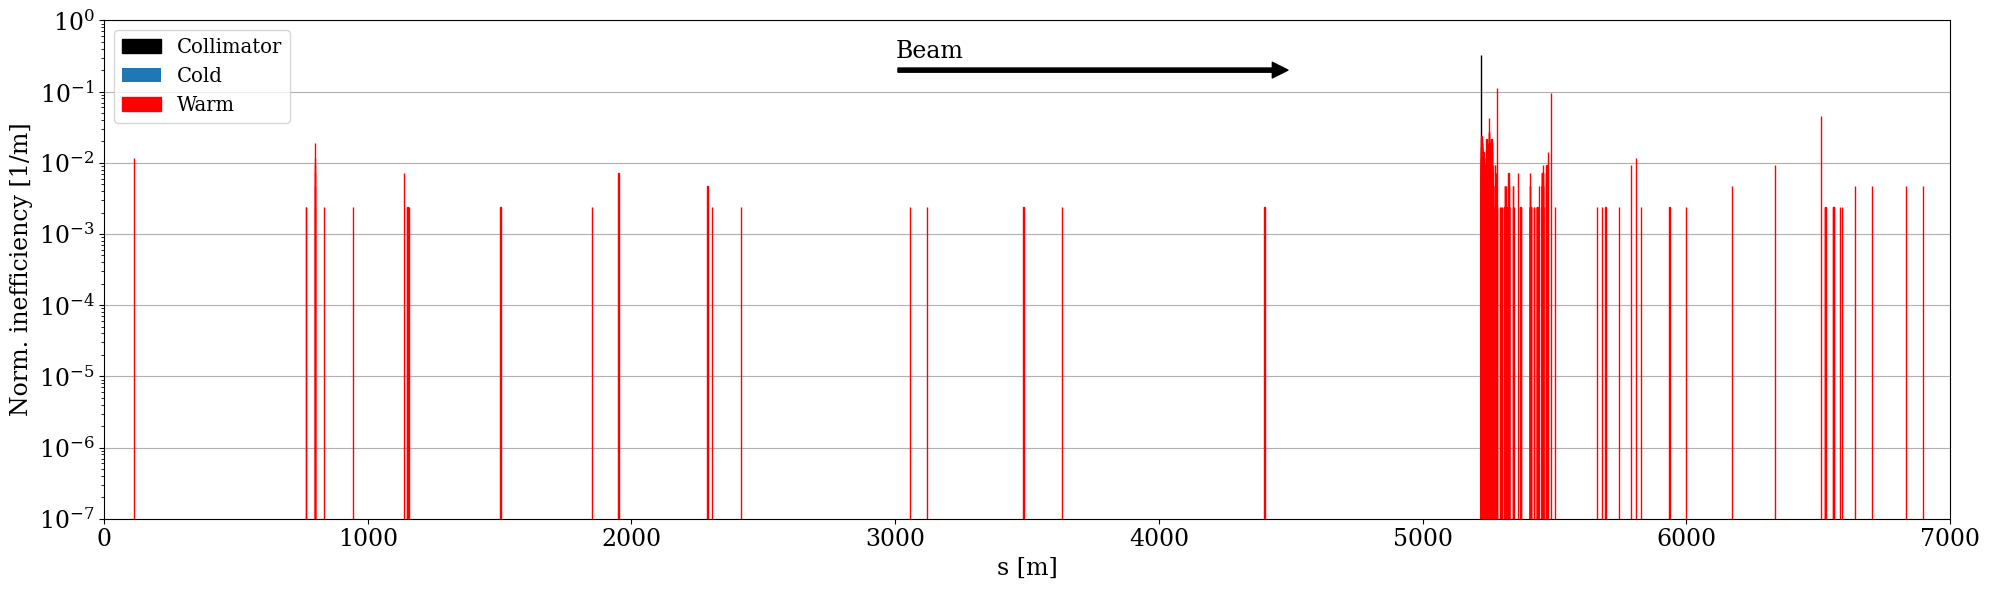

In [37]:
shell = 'xshell'
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_paths[sim_type][shell])
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile=f'lossmaps_diffusion/LM_{sim_type}_{shell}.png')
plt.show()

## L shell

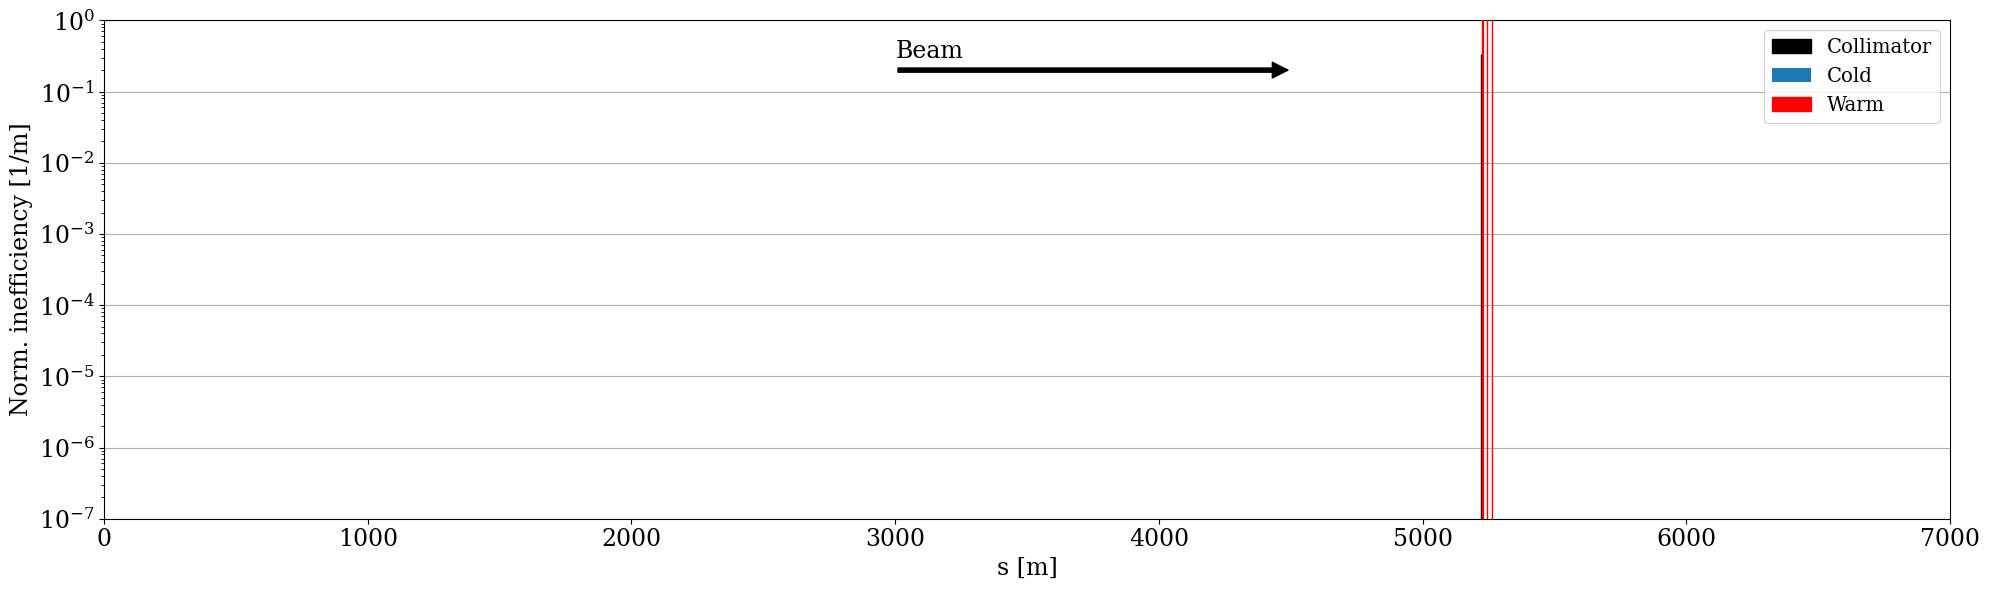

In [38]:
shell = 'lshell'
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_paths[sim_type][shell])
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile=f'lossmaps_diffusion/LM_{sim_type}_{shell}.png')
plt.show()

## XL shell

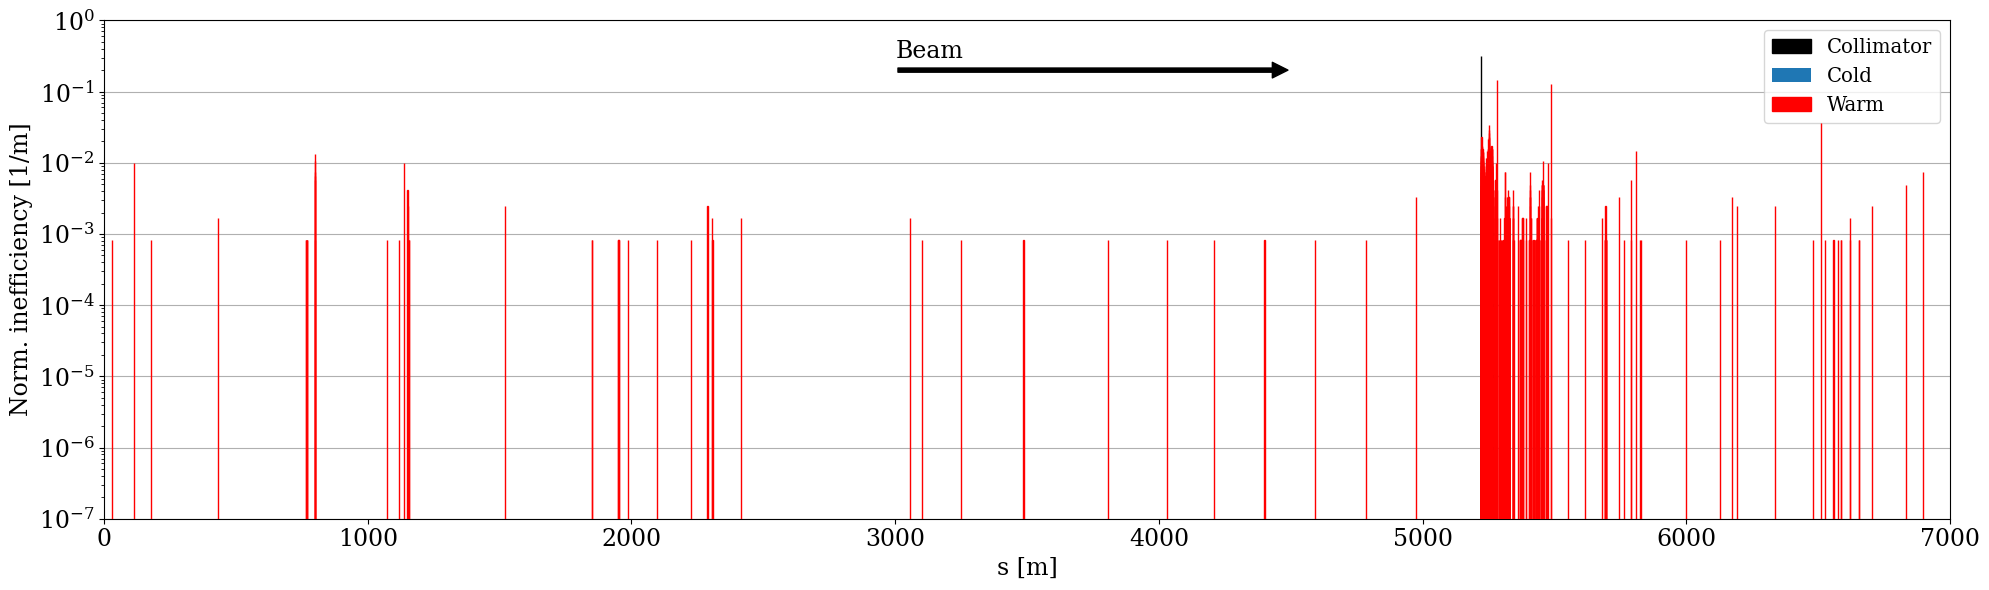

In [39]:
shell = 'xlshell'
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_paths[sim_type][shell])
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile=f'lossmaps_diffusion/LM_{sim_type}_{shell}.png')
plt.show()